# House Price prediction

## Import necessary libraries

In [99]:
import turicreate
import matplotlib.pyplot as plt

## Load the dataset

In [100]:
house_data = turicreate.SFrame('home_data.csv')

Finished parsing file /home/astha/home_data.csv

Parsing completed. Parsed 100 lines in 0.450588 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,int,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /home/astha/home_data.csv

Parsing completed. Parsed 21613 lines in 0.217451 secs.

## Exploring the data

In [101]:
house_data

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7129300520,20141013T000000,221900,3,1.0,1180,5650,1.0,0,0
6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0
5631500400,20150225T000000,180000,2,1.0,770,10000,1.0,0,0
2487200875,20141209T000000,604000,4,3.0,1960,5000,1.0,0,0
1954400510,20150218T000000,510000,3,2.0,1680,8080,1.0,0,0
7237550310,20140512T000000,1225000,4,4.5,5420,101930,1.0,0,0
1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0
2008000270,20150115T000000,291850,3,1.5,1060,9711,1.0,0,0
2414600126,20150415T000000,229500,3,1.0,1780,7470,1.0,0,0
3793500160,20150312T000000,323000,3,2.5,1890,6560,2.0,0,0


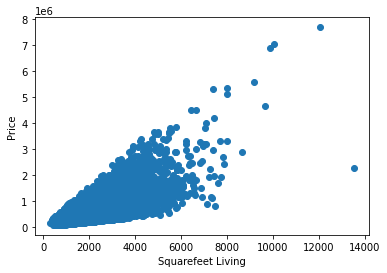

In [102]:
plt.xlabel('Squarefeet Living')
plt.ylabel('Price')
plt.scatter(x = house_data['sqft_living'], y = house_data['price'])

## Splitting data

In [103]:
train_data, test_data = house_data.random_split(.8, seed = 0)

## Building simple regression model

In [104]:
model_1 = turicreate.linear_regression.create(train_data, features= ['sqft_living'], target='price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.026396     | 4337728.158962     | 2322015.938829       | 263090.350675                   | 260237.001098                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

## Evaluating Errors

In [105]:
model_1.evaluate(test_data)

{'max_error': 4134046.3867336265, 'rmse': 255201.05306877726}

In [106]:
model_1.coefficients

name,index,value,stderr
(intercept),None,-48091.420373693574,5046.374834080003
sqft_living,None,283.0176980424739,2.218506808786938


## Visualizing Model

In [107]:
predictions_1 = model_1.predict(test_data)

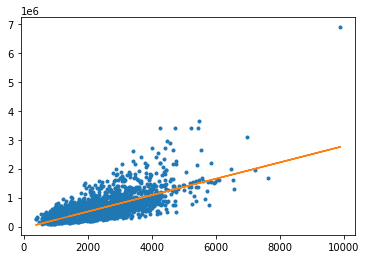

In [108]:
plt.plot(test_data['sqft_living'], test_data['price'], '.', test_data['sqft_living'], predictions_1, '-')

## Exploring other features of data

In [109]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [110]:
house_data[my_features].show()

Materializing SFrame

In [111]:
house_data['zipcode'].show()

Materializing SArray

<BarContainer object of 21613 artists>

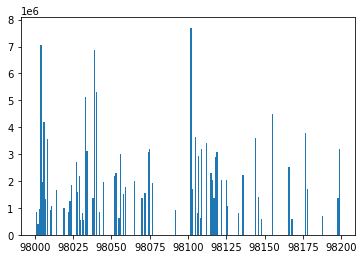

In [112]:
plt.bar(house_data['zipcode'], house_data['price'])

## Building model using other features

In [113]:
model_2 = turicreate.linear_regression.create(train_data, target='price', features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 7

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.042491     | 4086691.804433     | 2011837.734651       | 257060.730289                   | 264638.304640                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [114]:
model_2.coefficients

name,index,value,stderr
(intercept),None,-16524932.626017,3788064.1786703565
bedrooms,None,-67172.40479046416,2798.860672028911
bathrooms,None,9023.016181380775,4384.259547211416
sqft_living,None,321.48706478211017,3.5885561379405764
sqft_lot,None,-0.3878185601371637,0.050923440920223696
floors,None,-6307.751511644247,4321.6697011176875
zipcode,None,169.43227621546907,38.609191353765176


## Comparing both model's error

In [115]:
model_1.evaluate(test_data)

{'max_error': 4134046.3867336265, 'rmse': 255201.05306877726}

In [116]:
model_2.evaluate(test_data)

{'max_error': 3977343.6032996736, 'rmse': 252877.83976317185}

We can see that the errors are reduced in model_2.

## Predicting price of some houses using new model

In [127]:
house1 = house_data[house_data['id'] == 5309101200]

In [128]:
house1

Columns:
	id	int
	date	str
	price	int
	bedrooms	int
	bathrooms	float
	sqft_living	int
	sqft_lot	int
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	int
	lat	float
	long	float
	sqft_living15	int
	sqft_lot15	int

Rows: Unknown

Data:
+------------+-----------------+--------+----------+-----------+-------------+
|     id     |       date      | price  | bedrooms | bathrooms | sqft_living |
+------------+-----------------+--------+----------+-----------+-------------+
| 5309101200 | 20140605T000000 | 620000 |    4     |    2.25   |     2400    |
+------------+-----------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+---------+---------+---------------+-----+
| yr_built | yr_renovated | zipcode |   lat   |   long  | sqft_living15 | ... |
+----------+--------------+---------+---------+---------+---------------+-----+
|   1929   |      0       |  98117  | 47.6763 | -122.37 |      1250     | ... |
+----------+--------------+---------+---------+---------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="house1.png">

In [129]:
house1['price']

dtype: int
Rows: ?
[620000, ... ]

In [131]:
model_1.predict(house1)

dtype: float
Rows: 1
[631151.0549282439]

In [130]:
model_2.predict(house1)

dtype: float
Rows: 1
[610898.6855752915]

We can see that model 2 predict the house price closer to its actual price.

In [132]:
house2 = house_data[house_data['id'] == 1925069082]

In [133]:
house2

Columns:
	id	int
	date	str
	price	int
	bedrooms	int
	bathrooms	float
	sqft_living	int
	sqft_lot	int
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	int
	lat	float
	long	float
	sqft_living15	int
	sqft_lot15	int

Rows: Unknown

Data:
+------------+-----------------+---------+----------+-----------+-------------+
|     id     |       date      |  price  | bedrooms | bathrooms | sqft_living |
+------------+-----------------+---------+----------+-----------+-------------+
| 1925069082 | 20150511T000000 | 2200000 |    5     |    4.25   |     4640    |
+------------+-----------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |  2.0   |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+---------+----------+---------------+-----+
| yr_built | yr_renovated | zipcode |   lat   |   long   | sqft_living15 | ... |
+----------+--------------+---------+---------+----------+---------------+-----+
|   1952   |      0       |  98052  | 47.6393 | -122.097 |      3140     | ... |
+----------+--------------+---------+---------+----------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="house2.jpg">

In [134]:
print('Actual price of house:',house2['price'])
print('House price predicted by model_1:', model_1.predict(house2))
print('House price predicted by model_2:', model_2.predict(house2))

Actual price of house: [2200000, ... ]
House price predicted by model_1: [1265110.6985433854]
House price predicted by model_2: [1261006.5490756296]


## Predicting price of Bill Gates house

In [143]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':[98039], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src = "bill_gates.png">

In [144]:
model_2.predict(turicreate.SFrame(bill_gates))

dtype: float
Rows: 1
[15736097.525110248]